# Chapter 4: AI Regression 1

## Primer on lines and parabolas

### Lines

A straight line in cartesian coordinate system $(x,y)$ is represented as:
$$ y = a + bx $$
where $a$ and $b$ are called coefficients and have concrete values.

 - $a$ is the intercept
 - $b$ is the slope

We have for example the line $ y = 1 + 2x $ with the following table values and graphs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def line(x): return 1+2*x
x = np.arange(5)
print("x  y")
for i in x:
    print("{}  {}  ".format(i, line(i)))

x  y
0  1  
1  3  
2  5  
3  7  
4  9  


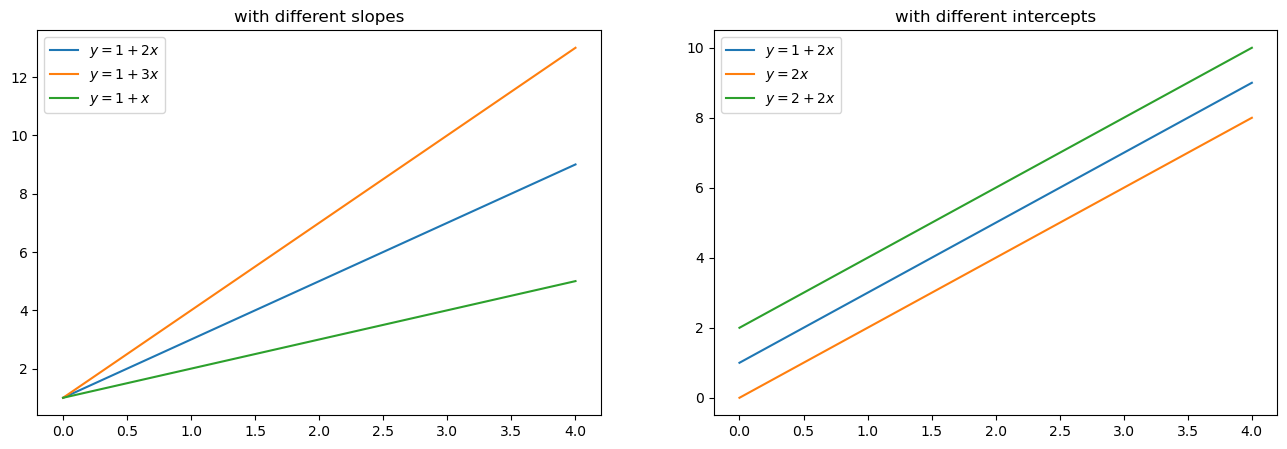

In [3]:
def line2(x): return 1 + 3*x
def line3(x): return 1 + x

fig, axs = plt.subplots(1,2, figsize=(16,5))
axs[0].plot(x, line(x))
axs[0].plot(x, line2(x))
axs[0].plot(x, line3(x))
axs[0].legend(["$y=1+2x$","$y=1+3x$","$y=1+x$"])
axs[0].set_title("with different slopes")

def line4(x): return 2*x
def line5(x): return 2 + 2*x

axs[1].plot(x, line(x))
axs[1].plot(x, line4(x))
axs[1].plot(x, line5(x))
axs[1].legend(["$y=1+2x$","$y=2x$","$y=2+2x$"])
axs[1].set_title("with different intercepts")
plt.show()

### Parabolas

Consider a parabolas given by the following quadratic polynomial
$$ y = ax^2 + bx + c $$

with
- $c$ the intercept
- $a > 0$ open upward, $a <0 $ open downward

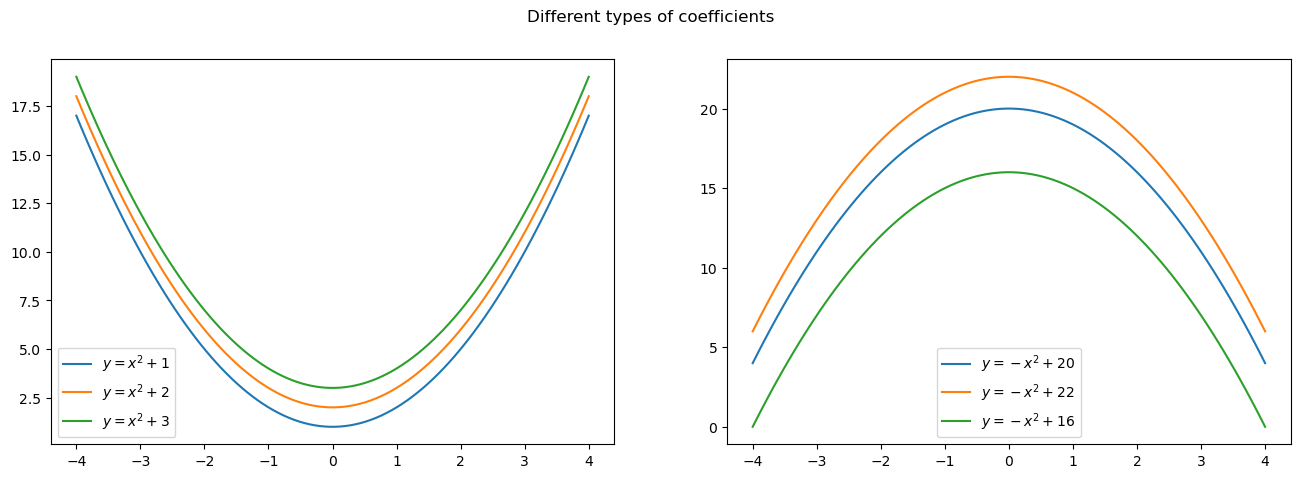

In [4]:
def line(x): return x**2 + 1
def line2(x): return x**2 + 2
def line3(x): return x**2 + 3
def line4(x): return -x**2 + 20
def line5(x): return -x**2 + 22
def line6(x): return -x**2 + 16

x = np.linspace(-4,4,100)

fig, axs = plt.subplots(1,2, figsize=(16,5))
axs[0].plot(x,line(x))
axs[0].plot(x,line2(x))
axs[0].plot(x,line3(x))
axs[0].legend(["$y=x^2+1$","$y=x^2+2$","$y=x^2+3$"])

axs[1].plot(x,line4(x))
axs[1].plot(x,line5(x))
axs[1].plot(x,line6(x))
axs[1].legend(["$y=-x^2+20$","$y=-x^2+22$","$y=-x^2+16$"])

fig.suptitle("Different types of coefficients")
plt.show()

## Simple linear regression

In a nutshell, simple linear regression is the investigation of a linear relationship between an independent variable $x$ (also called predictors, explanatory variables or inputs) and a dependent variable $y$ (or target variable, output).

We can observe in the following graph that there is a linear relationship between x and y values.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

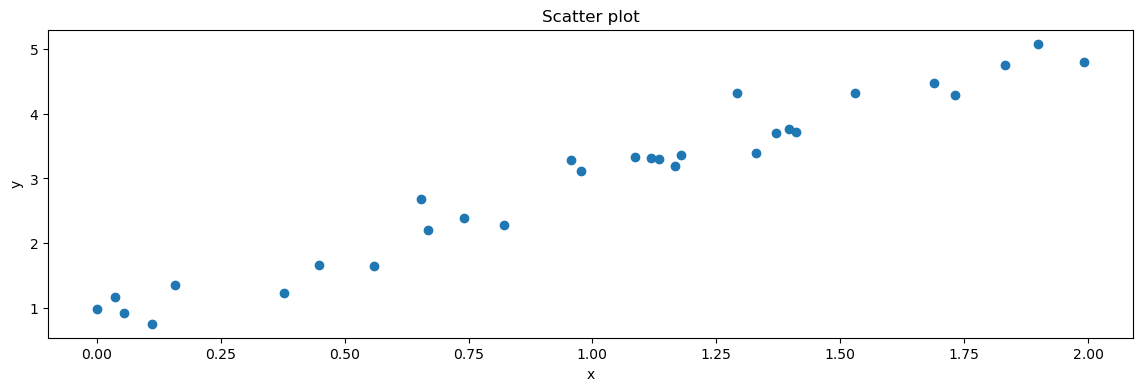

In [6]:
path = os.path.join(os.getcwd(), "data/linreg_data.csv")
data = pd.read_csv(path, names = ["x","y"])

plt.figure(figsize=(14,4))
plt.scatter(data.x, data.y)
plt.ylabel("y")
plt.xlabel("x")
plt.title("Scatter plot")
plt.show()

In simple linear regression we assume that the underlying model is the linear model

$$ \hat{y} = a + bx $$

where $\hat{y}$ is the predicted value of $y$.

The goal is to estimate the parameters $a$ and $b$ that fits the best our data points. We want to find a line that minimize the distance between the true value $y_i$ and $\hat{y}_i$ for each $i$ .

We form the residual sum of squares as

$$ RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n (y_i - a - bx_i)^2 $$

We would like to make this value as small as possible in order to have the smallest total error, in other word, $\hat{a}$ and  $\hat{b}$ solve the following minimization problem.

$$ (\hat{a}, \hat{b}) = \underset{a,b}{\operatorname{argmin}} \sum_{i=1}^n (y_i - a - b x_i)^2 
$$

The graph below illustrates the result of the problem statement with the residuals (error distance between ${y_i}$ and ${\hat{y}_i}$).

const    0.840399
x        2.138776
dtype: float64


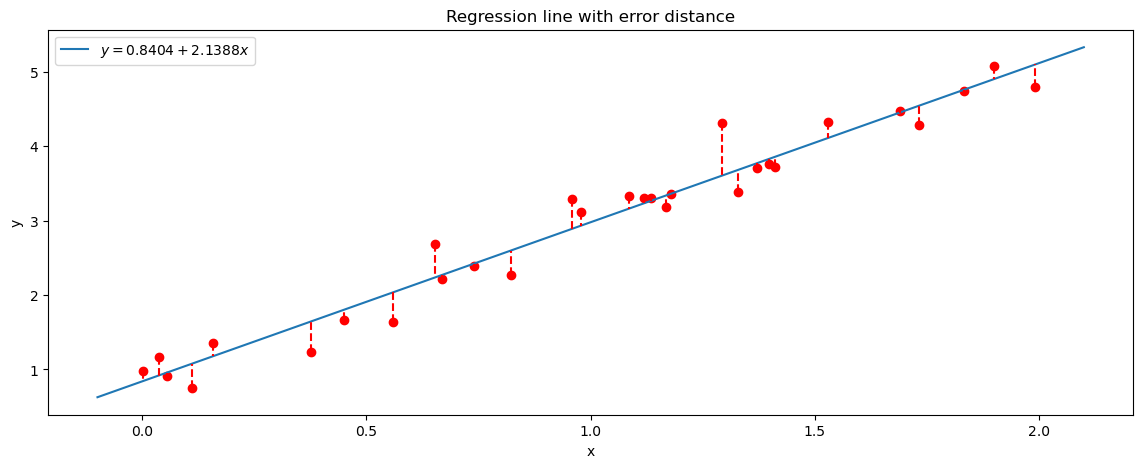

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

X = data.x
y = data.y
# Add constant to x for statsmodels
X = sm.add_constant(X)
# Fit the model
model = sm.OLS(y, X).fit()
coeff = model.params

print(coeff)

x = np.linspace(-0.1,2.1, 100)
y = coeff.const + coeff.x*x
yhat = coeff.const + coeff.x*data.x

plt.figure(figsize=(14,5))
plt.plot(x,y)
plt.scatter(data.x,data.y, c = "r" )
plt.legend(["$y = {:.4f} + {:.4f}x $".format(coeff.const, coeff.x)])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression line with error distance")
for i in range(len(data.x)):
    plt.vlines(data.x[i],data.y[i],yhat[i], linestyles='--', colors = 'red')
plt.show()

## Model evaluation

The accuracy of the model can be evaluated by computing the $RMSE$ (Root Mean Square Error)
$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$

Note that 

$$ RMSE = \frac{1}{\sqrt{n}}\sqrt{RSS} $$

There are also other error quantities such as $MAE$ (Mean Absolute Error)
$$ MAE = \frac{1}{n}\sum_{i}^n \left| y_i - \hat{y}_i \right| $$

and $MSE$ (Mean Squared Error)
$$ MSE = \frac{1}{n}\sum_{i}^n (y_i - \hat{y}_i)^2 $$

Another standard of measure of goodness of fit is the coefficient of determination $R2$ defined by:
$$ R^2 = 1 - \frac{\sum_{i}^2(y_i - \hat{y}_i)^2}{\sum_{i}^2(y_i - \overline{y})^2} $$

where $\overline{y}$ is the mean of all the $y_i$

$R^2$ is between 0 and 1 where $R^2 = 1$ would mean that all predicted values match the actual values.

## Simple linear regression in python with formulas

We reuse the same dataset from above and do the calculation step by step.

We first import the data and inspect them

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.path.join(os.getcwd(), "data/linreg_data.csv")

data = pd.read_csv(path,skiprows=0,names=["x","y"])
data.head()

,x,y
0,0.558839,1.643261
1,1.135218,3.298449
2,1.292233,4.317444
3,1.731773,4.292910
4,0.376881,1.234585


It is also a good idea to have a visual view of our data by plotting them.

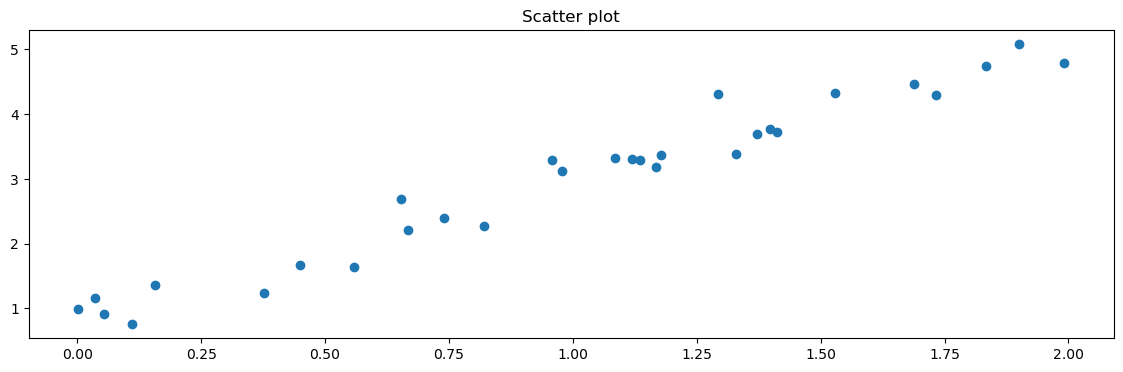

In [9]:
xpd = data["x"]
ypd = data["y"]
n = xpd.size
plt.figure(figsize=(14,4))
plt.scatter(xpd,ypd)
plt.title("Scatter plot")
plt.show()

We compute $\overline{x}$ and $\overline{y}$ the mean of $x_i$ and $y_i$

In [10]:
xbar = np.mean(xpd)
ybar = np.mean(ypd)

Then $\sum_{i=1}^n x_i y_i $  and $\sum_{i=1}^n x_i^2 $

In [11]:
term1 = np.sum(xpd*ypd)
term2 = np.sum(xpd**2)

and finally our coefficients that solves the minimization problem above:
$$ \hat{b} = \frac{\sum_{i=1}^n x_i y_i - n\overline{x}y}{\sum_{i=1}^n x_i^2 - n\overline{x}^2} $$
$$ \hat{a} = \overline{y} - b\overline{x} $$

In [12]:
b = (term1 - n*xbar*ybar)/(term2-n*xbar*xbar)
a = ybar - b*xbar
print("Coefficient a: {:.5f}".format(a))
print("Coefficient b: {:.5f}".format(b))

Coefficient a: 0.84040
Coefficient b: 2.13878


We can plot our results

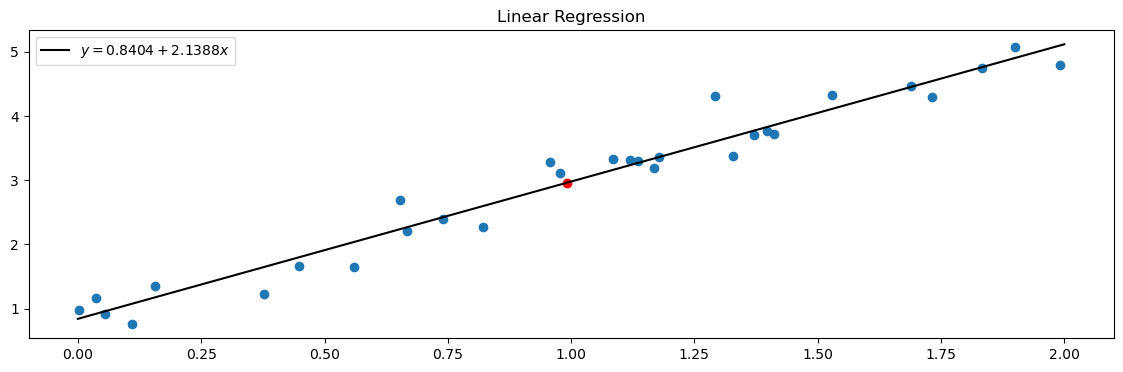

In [13]:
x = np.linspace(0,2,100)
y = a + b*x
plt.figure(figsize = (14,4))
plt.plot(x,y, color="black")
plt.scatter(xpd,ypd)
plt.scatter(xbar,ybar,color="red")
plt.legend(["$y = {:.4f} + {:.4f}x $".format(a, b)])
plt.title("Linear Regression")
plt.show()

We can also use the regression line to predict the corresponding value for any $x$ value

In [14]:
xval = 0.50
yval = a+b*xval
print("Predicted y value: {}".format(yval))

Predicted y value: 1.9097866588445873


We can evaluate our model by computing error indicators:

In [15]:
yhat = a+b*xpd
RSS = np.sum((ypd-yhat)**2)
print("RSS  =",RSS)
RMSE = np.sqrt(np.sum((ypd-yhat)**2)/n)
print("RMSE =",RMSE)
MAE = np.sum(np.abs(ypd-yhat))/n
print("MAE  =",MAE)
MSE = np.sum((ypd-yhat)**2)/n
print("MSE  =",MSE)
R2 = 1-np.sum((ypd-yhat)**2)/np.sum((ypd-ybar)**2)
print("R2   =",R2)


RSS  = 1.9762720606619884
RMSE = 0.2566626878909352
MAE  = 0.19969075618017426
MSE  = 0.06587573535539962
R2   = 0.9588798319617569


The high value of $R^2$ shows a very nice fit of the model on the data. he other quantities here must be interpreted with more care since they depend on the scale of y values.

## Simple linear regression in python with sklearn

In [16]:
import numpy as np
import os
from sklearn import linear_model

We first read the data and convert it into 2D arrays

In [17]:
path = os.path.join(os.getcwd(), "data/linreg_data.csv")

data = np.genfromtxt(path, delimiter = ',')
xp = data[:,0]
yp = data[:,1]
xp = xp.reshape(-1,1)  # reshape it into a vector
yp = yp.reshape(-1,1)  # reshape it into a vector
print(yp[:3]) # first three lines of y ..

[[1.643261]
 [3.298449]
 [4.317444]]


Model creation and training is straightforward using `fit()`:

In [18]:
model =  linear_model.LinearRegression()
model.fit(xp,yp)

print("Coefficient: {}".format(model.coef_[0][0]))
print("Intercept:   {}".format(model.intercept_[0]))

Coefficient: 2.138775903173365
Intercept:   0.8403987072579042


We want to make some prediction for $x=0.5$. Note that sklearn uses arrays.

In [19]:
xval = np.full((1,1), 0.5)
yval = model.predict(xval)
print("y predicted: {}".format(yval))

y predicted: [[1.90978666]]


Plot the results again

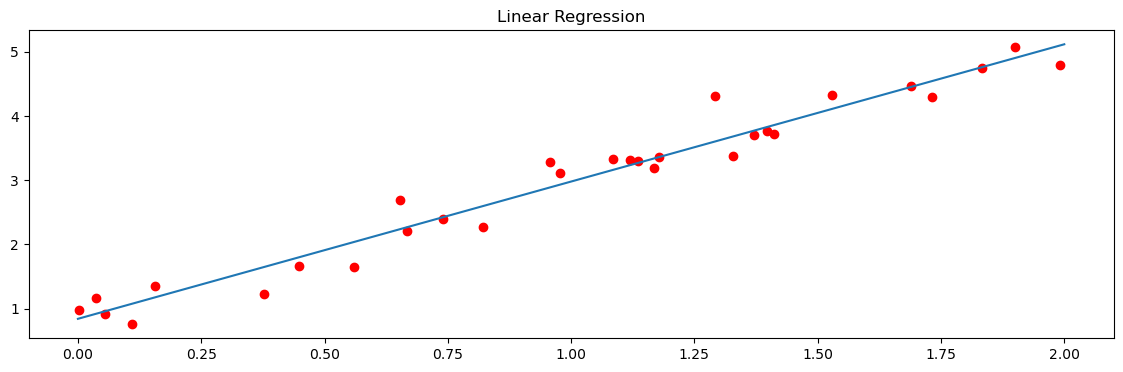

In [20]:
xval = np.linspace(0,2,20).reshape(-1,1)
yval = model.predict(xval)
plt.figure(figsize=(14,4))
plt.plot(xval,yval)
plt.scatter(xp,yp,c="r")
plt.title("Linear Regression")
plt.show()

To read metrics we can import `metrics` from `sklearn`

In [21]:
from sklearn import metrics
yhat = model.predict(xp)
print('Mean Absolute Error:     {}'.format(metrics.mean_absolute_error(yp, yhat)) )  
print('Mean Squared Error:      {}'.format(metrics.mean_squared_error(yp, yhat)) )  
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(yp, yhat))) )
print('R2 value:                {}'.format(metrics.r2_score(yp, yhat)) )

Mean Absolute Error:     0.19969075618017434
Mean Squared Error:      0.06587573535539963
Root Mean Squared Error: 0.2566626878909352
R2 value:                0.9588798319617569


## Polynomial regression

If the data points we plot doesn't look linear, we can try using a higher order polynomials model. For example a quadratic model (degree 2):
$$ \hat{y} = ax^2 + bx + c $$ 

Or a cubic model (degree 3): 
$$ \hat{y} = ax^3 + bx^2 + cx + d $$

and so on.. Let's try with another dataset directly with sklearn

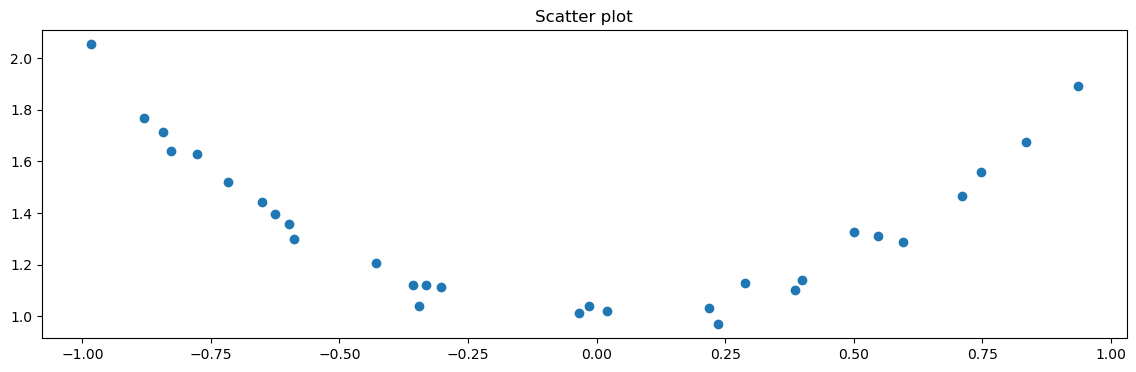

In [22]:
path = os.path.join(os.getcwd(), "data/quadreg_data.csv", )
data = pd.read_csv(path, skiprows=0, names = ["x","y"] )
plt.figure(figsize=(14,4))
plt.scatter(data.x,data.y)
plt.title("Scatter plot")
plt.show()

We can see in the graph above that the data is of a quadratic form, let's fit a quadratic model.

We first import the `LinearRegression` and `LinearRegression` classes

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Then transform to the data into arrays

In [24]:
xpd = np.array(data.x).reshape(-1,1)
ypd = np.array(data.y).reshape(-1,1)

And set up the polynomial regression model with the appropriate degree

In [25]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(xpd)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, ypd)

a = pol_reg.coef_[0][-1]
b = pol_reg.coef_[0][-2]
c = pol_reg.intercept_[0]

print("Coefficient a:  {:=9.6f}".format(a))
print("Coefficient b:  {:=9.6f}".format(b))
print("Intercept   c:  {:=9.6f}".format(c))

Coefficient a:   1.015812
Coefficient b:  -0.010092
Intercept   c:   0.991405


Let's plot the result

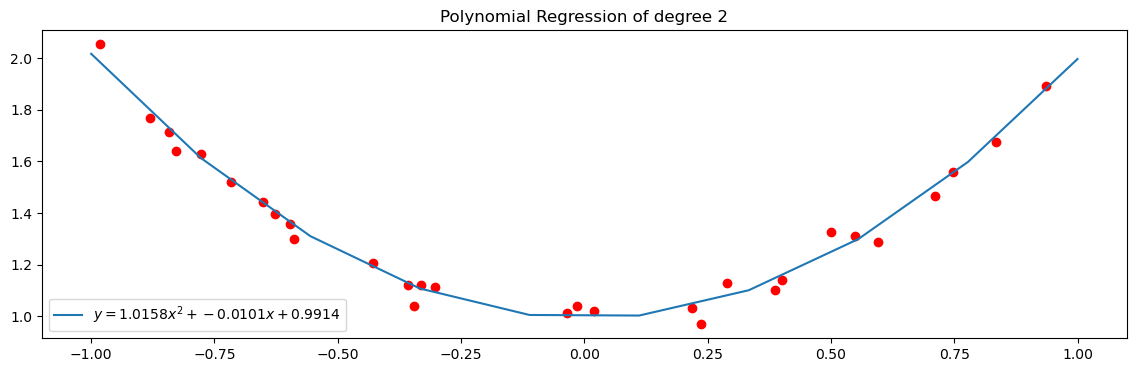

In [26]:
xval = np.linspace(-1,1,10).reshape(-1,1)
plt.figure(figsize=(14,4))
plt.plot(xval, pol_reg.predict(poly_reg.fit_transform(xval)))
plt.scatter(xpd,ypd, c='r')
plt.legend(["$y = {:.4f}x^2 + {:.4f}x + {:.4f}$".format(a,b,c)])
plt.title("Polynomial Regression of degree 2")
plt.show()

## Dataset splitting

It is common practice to divide dataset into a **training** and **testing**  set (usually a 80/20 or 70/30 ratio) and use the training data to train our model and the testing data to see how the model performs in data it has never seen before.

Sklearn provides a function for that purpose `train_test_split()` that splits data **randomly** between a training and testing set.

Let's predict the chance of admission in college.

In [27]:
import pandas as pd
import matplotlib.pylab as plt
import os
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

In [28]:
path = os.path.join(os.getcwd(), 'data/Admission_Predict.csv')
df = pd.read_csv(path)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


We want to see how GCPA predict the chance of admission into college.
- `CGPA` is our independent variable
- `Change of Admit` is our dependent variable

We prepare our data and split them in a 80/20 ratio and plot them

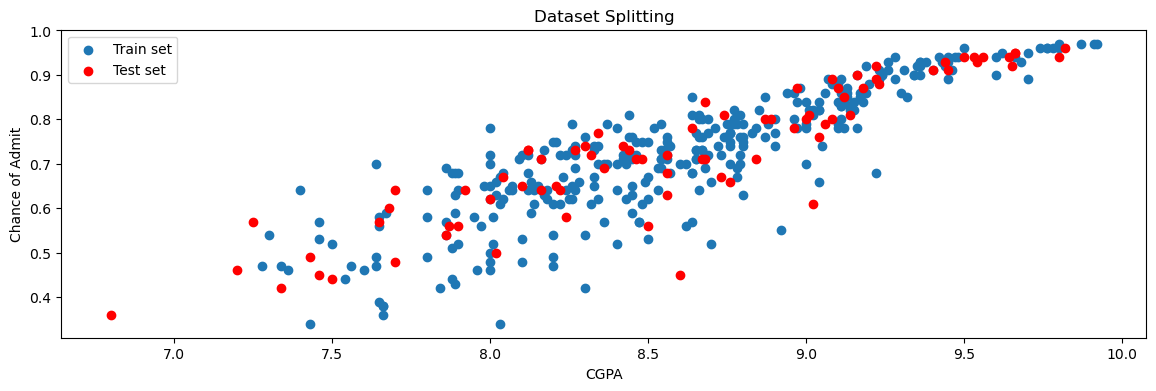

In [29]:
X = df[['CGPA']]
y = df[['Chance of Admit ']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

plt.figure(figsize=(14,4))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c='r')
plt.legend(["Train set", "Test set"])
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.title("Dataset Splitting")
plt.show()

We can observe that there seems to be a linear relationship between `CGPA` and `Chance of Admit` so let's train a linear model using the training data

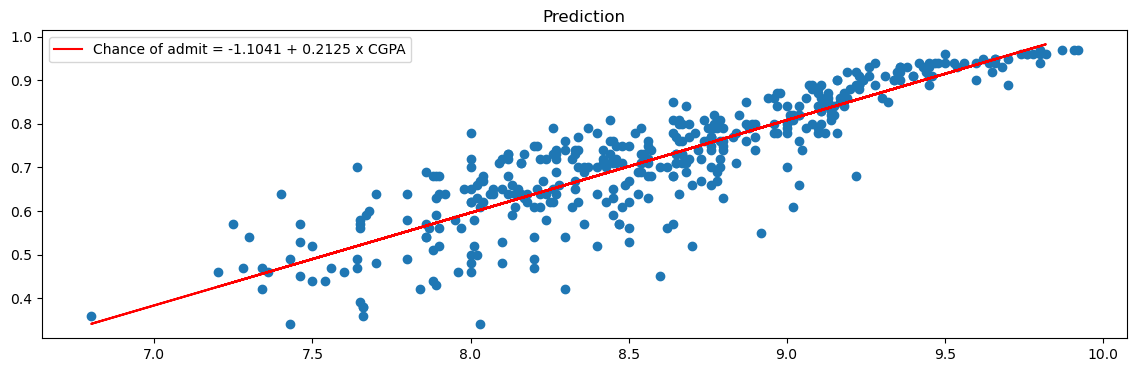

In [30]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

b = model.coef_[0][0]
a = model.intercept_[0]
y_predict = lm.predict(X_test)

plt.figure(figsize=(14,4))
plt.plot(X_test, y_predict, c='r')
plt.scatter(X,y)
plt.legend(["Chance of admit = {:.4f} + {:.4f} x CGPA".format(a,b)])
plt.title("Prediction")
plt.show()

Finally let's compute $R^2$ on the test data with two different ways

In [31]:
print("R2=",lm.score(X_test,y_test)) # using linear model
print("R2=",metrics.r2_score(y_test,y_predict))# using sklearn metrics

R2= 0.8133904506540574
R2= 0.8133904506540574
